In [1]:
# This notebook generates word clouds for all the topics for projects of each language.

DATA_PATH = 'data/repo_metadata.json'
# LANGUAGE = 'Java'
# LANGUAGE = 'Python'
# LANGUAGE = 'Go'
LANGUAGE = 'JavaScript' # we include TypeScript in this

# cd to repo root
import os
os.chdir(os.path.dirname(os.getcwd()))

In [2]:
import pandas as pd

In [3]:
compression = None if DATA_PATH.endswith('.json') else 'infer'
df = pd.read_json(DATA_PATH, compression=compression)

print("Data loaded from {}.".format(DATA_PATH))

# Set all primaryLanguage to 'JavaScript' if it is 'TypeScript'
df.loc[df['primaryLanguage'] == 'TypeScript', 'primaryLanguage'] = 'JavaScript'

Data loaded from data/repo_metadata.json.


In [4]:
# Apply the same filtering as create_datasets.py
MIN_PULL_REQUESTS = 50
MIN_COMMIT_COUNT = 50
MIN_STARS = 50
MIN_USERS = 5
PUSHED_SINCE = "2016-01-01"
lang_df = df[
    (df["pullRequests"] >= MIN_PULL_REQUESTS)
    & (df["primaryLanguage"] == LANGUAGE)
    & (df["pushedAt"] > PUSHED_SINCE)
    & (df["assignableUserCount"] >= MIN_USERS)
    & (df["defaultBranchCommitCount"] >= MIN_COMMIT_COUNT)
    & (df["stars"] >= MIN_STARS)
]

In [5]:
# Read all of the 'topics' into a list
topics = []
for ts in lang_df['topics']:
    for t in ts:
        topics.append(t['name'])

# Remove topics that are just the name of the language and stupid hacktoberfest
topics = [t for t in topics if t not in ['javascript', 'python', 'java', 'go', 'typescript', 'hacktoberfest', 'python3', 'golang']]

# Print 10 most common topics
from collections import Counter
print(Counter(topics).most_common(10))

[('react', 1067), ('nodejs', 717), ('blockchain', 214), ('angular', 210), ('react-native', 209), ('ethereum', 205), ('vue', 202), ('graphql', 196), ('reactjs', 184), ('node', 163)]


/tmp/ipykernel_2292273/2624788278.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


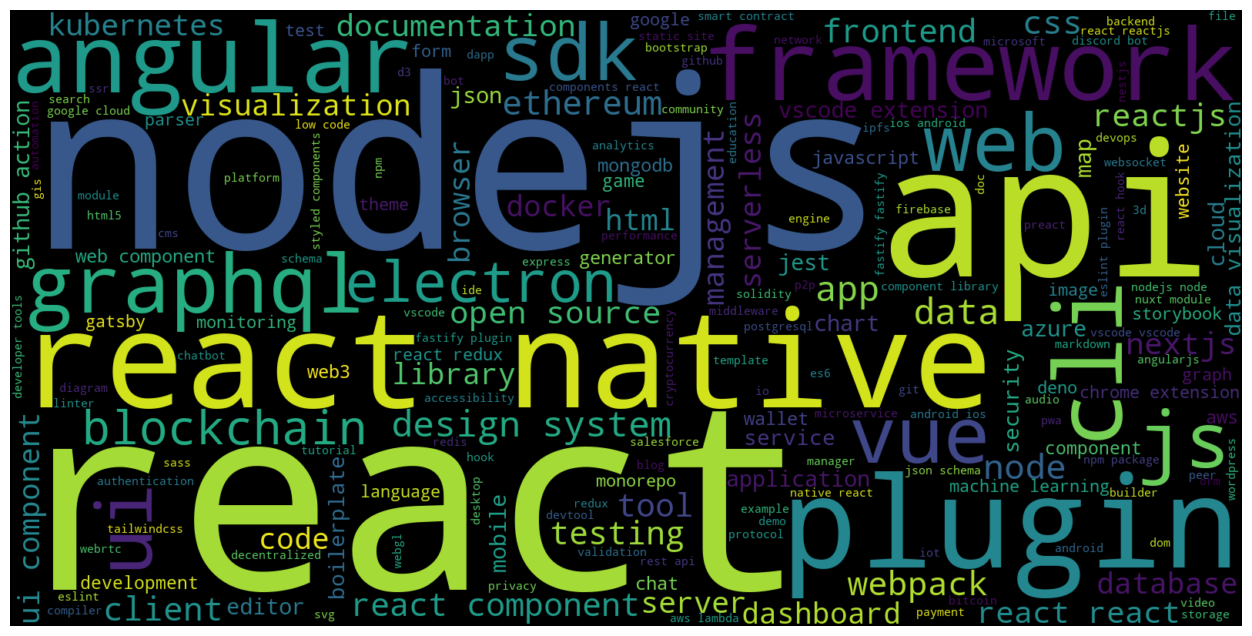

In [6]:
# Create a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.style.use('seaborn-dark')

wordcloud = WordCloud(width=1600, height=800).generate('\n'.join(topics))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
import sklearn.metrics as metrics

precision = 0.5
recall = 1

tp = precision * 1000
fp = (1 - precision) * 1000
fn = (tp - recall * tp) / recall
tn = tp + fn - fp

# Round all
tp = round(tp)
fp = round(fp)
fn = round(fn)
tn = round(tn)

# create lists of labels and predictions
labels = [1] * (tp + fn) + [0] * (fp + tn)
predictions = [1] * tp + [0] * fn + [1] * fp + [0] * tn
sample_weights = [1] * (tp + fn) + [19] * (fp + tn)
metrics.f1_score(labels, predictions, sample_weight=sample_weights)


0.09523809523809523